In [1]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from IPython.display import clear_output



plot_path = get_plotpath('comparison')
print(plot_path)
make_folders(plot_path)
fn_base = plot_path + '/prof_map_'
print(fn_base)

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison/
/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//prof_map_


In [2]:
from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map,plot_map_diff_only
from useful_scit.imps import (np, xr, plt, pd) 
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.plot.plot_profiles import plot_profile, set_legend_area_profs, set_scalar_formatter

# load and autoreload
from useful_scit.plot import get_cmap_dic
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from matplotlib import gridspec

In [4]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2009-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
if avg_over_lev:
    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

In [5]:
cases_sec = ['SECTv21_ctrl']
cases_orig =['noSECTv21_default'] 
cases_orig =['noSECTv21_ox_ricc']

cases = cases_orig + cases_sec

# Combined plots

In [6]:
import cartopy.crs as ccrs

In [7]:
from sectional_v2.util.plot.colors import get_area_col
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sectional_v2.data_info import get_nice_name_case

In [8]:
linests = ['solid','dashed','dotted']

## Area defs 1:

In [9]:
areas = ['Global','landOnly','notLand', 'Polar N','Polar S']

In [10]:
import seaborn as sns

### Code


In [11]:
def plt_prof_map_together(var, areas, cases, asp_rat=1, width=6):
    fig = plt.figure(figsize = [width,asp_rat*width])
    gs = gridspec.GridSpec(2, 2,height_ratios=[1,1.], width_ratios=[5,1] )#width_ratios=[2, 1]) 
    ax1 = plt.subplot(gs[1,0])
    ax2 = plt.subplot(gs[1,1])
    ax3 = plt.subplot(gs[0,:], projection=ccrs.Robinson())
    ax2.axis('off')
    
    cmapd = get_cmap_dic(areas)
    
    linestd=dict()
    linestd_nn=dict()
    for case, ls in zip(cases, linests):
        linestd[case]=ls
        linestd_nn[get_nice_name_case(case)]=ls
    ax =ax1# plt.subplots(1, figsize=[6,8])
    
    for area in areas:
        prof_dic = get_averaged_fields.get_profiles(cases,[var],startyear, endyear,area=area,
                                                  pressure_adjust=pressure_adjust)
    
        for case in cases:
            kwargs = dict(color=get_area_col(area), linestyle=linestd[case])
            plot_profile(prof_dic[case][var], 
                         ax=ax, 
                         kwargs=kwargs, 
                         xscale='log', 
                         label=case+', '+ area,
                         ylim=[1000,200])#, 
    ax.grid(False, which='both')
    sns.despine(ax=ax)
    ax.set_yscale('log')
    
    
    set_scalar_formatter(ax)
    cases_nn = [get_nice_name_case(case) for case in cases]
    set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    # maps:

    maps_dic = get_averaged_fields.get_maps_cases(cases,[var],startyear, endyear,
                                       avg_over_lev=avg_over_lev,
                                       pmin=pmin,
                                       pressure_adjust=pressure_adjust)
    plot_map_diff_only(var, cases, maps_dic, relative=True, cbar_equal=True,
                              kwargs_diff={}, axs=ax3, cmap_diff='RdBu_r')#, cbar_loc='under')
    
    
    #plt.tight_layout()
    return fig, [ax1,ax3]

### SOA_NA/SO4_NA

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//mea

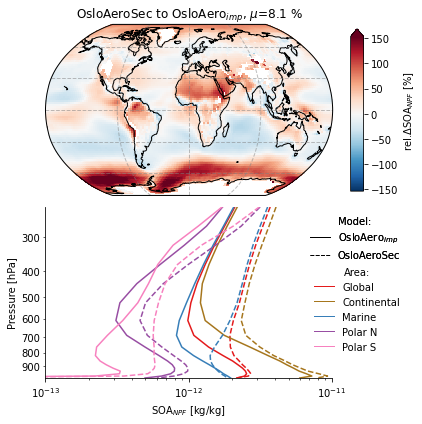

In [12]:
var = 'SOA_NA'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
axs[0].set_xlim([1e-13,1e-11])
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//mea

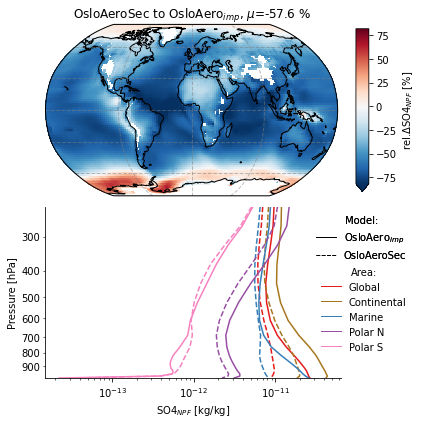

In [13]:
var = 'SO4_NA'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

### NCONC01

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEM

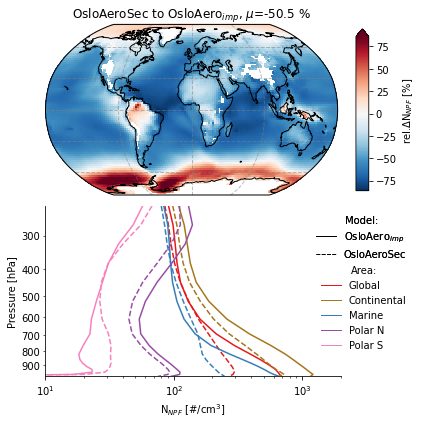

In [14]:
var = 'NCONC01'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
axs[0].set_xlim([10,2e3])
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

### N_AER

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/pro

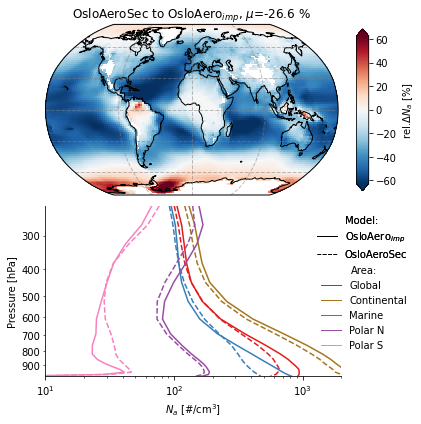

In [15]:
var = 'N_AER'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
axs[0].set_xlim([10,2e3])
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

### SOA_SV:

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//mea

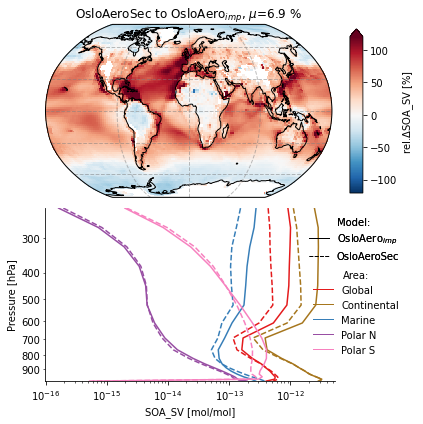

In [16]:
var = 'SOA_SV'
fig, axs = plt_prof_map_together(var, areas, cases)
plt.show()

## Area defs 2:

In [15]:
areas = ['Global','landOnly','notLand', 'Polar N','Polar S','Amazonas and surroundings']

### SOA_NA/SO4_NA

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//mea

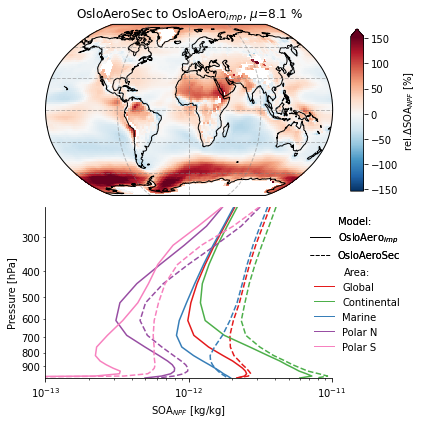

In [13]:
var = 'SOA_NA'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
axs[0].set_xlim([1e-13,1e-11])
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//mea

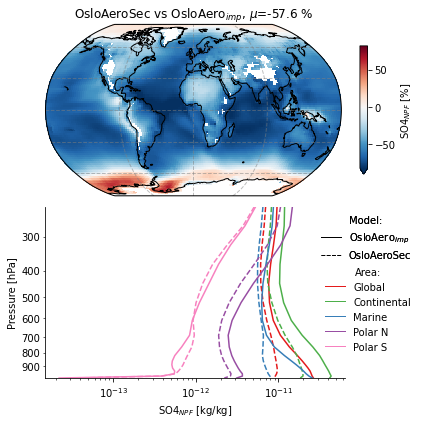

In [13]:
var = 'SO4_NA'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

### NCONC01

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEM

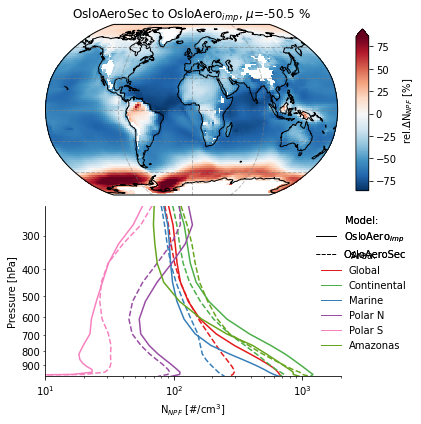

In [17]:
var = 'NCONC01'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
axs[0].set_xlim([10,2e3])
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

### N_AER

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/pro

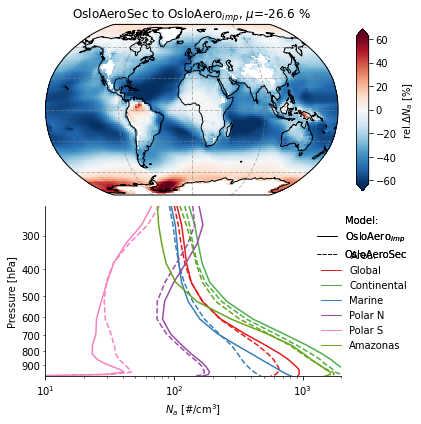

In [16]:
var = 'N_AER'
fig, axs = plt_prof_map_together(var, areas, cases, asp_rat=1)
axs[0].set_xlim([10,2e3])
fn_figure = '%s%s_%s-%s.'%(fn_base,var,startyear, endyear)
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

### SOA_SV:

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//mea

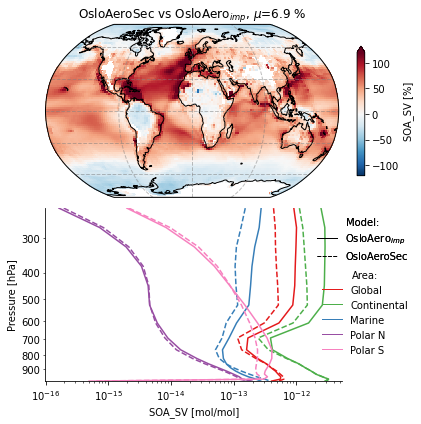

In [16]:
var = 'SOA_SV'
fig, axs = plt_prof_map_together(var, areas, cases)
plt.show()